In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

  ### Preprocessing

In [2]:
# Load data
file_path = Path("../csv/loans_data_encoded.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [3]:
# Define features set
X = loans_df.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [4]:
# Define target vector
y = loans_df["bad"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

  ### Choose best learning rate

In [ ]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0
    )

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (train): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (test): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

  ### Create Gradient Boosting Classifier

In [ ]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.75,
    max_features=2,
    max_depth=3,
    random_state=0
)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

  ### Evaluate the model

In [ ]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

In [ ]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

In [8]:
X.columns

Index(['amount', 'term', 'age', 'month_num', 'education_Bachelor',
       'education_High School or Below', 'education_Master or Above',
       'education_college', 'gender_female', 'gender_male'],
      dtype='object')

In [10]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

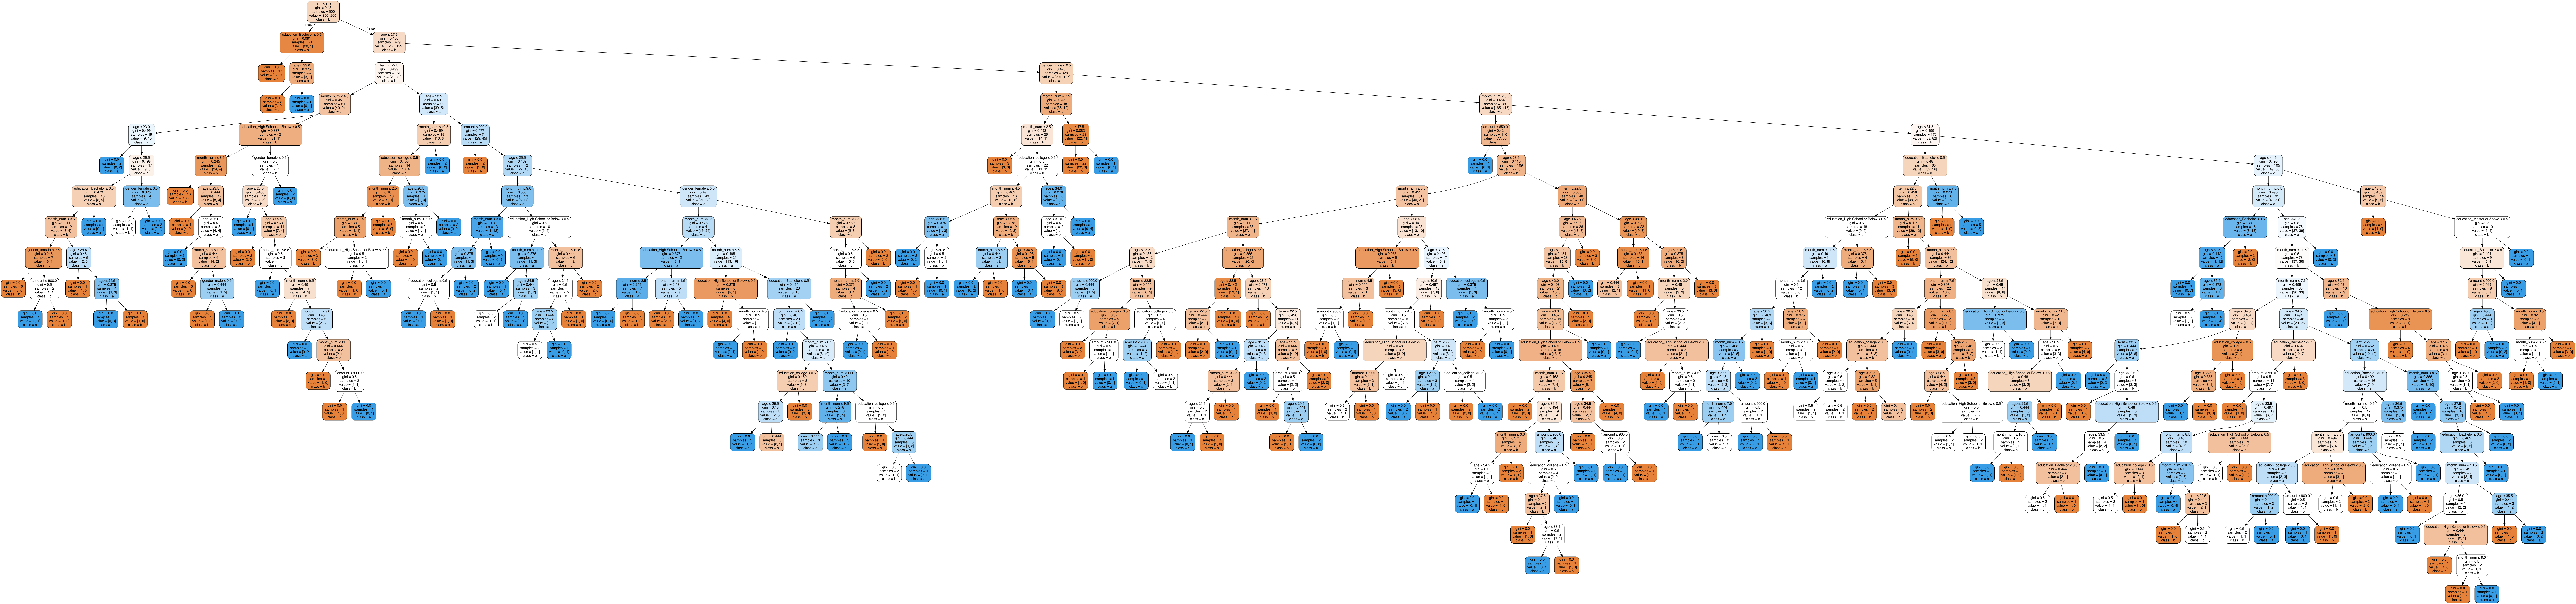

In [17]:
# Create a DOT data representation of the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns.to_list(),
                                class_names='bad',
                                filled=True, rounded=True,
                                special_characters=True)

# Create a Pydotplus graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the tree visualization as a PDF or any other format you prefer
graph.write_pdf("iris_decision_tree.pdf")

# Optionally, display the visualization in Jupyter Notebook
from IPython.display import Image
Image(graph.create_png())
